<a href="https://colab.research.google.com/github/GoldenMAverick/MSNIT-image-recognizer-from-Scratch/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation
%matplotlib inline

In [69]:
keras.backend.backend()

'tensorflow'

In [70]:
(x_train,y_train),(x_test,y_test)= keras.datasets.mnist.load_data()

In [71]:
x_train= x_train/255
# y_train= y_train/255
x_test= x_test/255

In [72]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation= 'relu'),
    keras.layers.Dense(10, activation= 'softmax')
])

model.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

model.fit(x_train,y_train, epochs= 3 )

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8762 - loss: 0.4310
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9636 - loss: 0.1238
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9761 - loss: 0.0789


In [73]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9721 - loss: 0.0927


[0.0796242505311966, 0.9765999913215637]

In [74]:
yp= model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [75]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=tf.argmax(yp, axis=1))
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    2,    0,    1,    0,    3,    1,    2,    0],
       [   0, 1121,    4,    0,    0,    1,    3,    1,    5,    0],
       [   2,    0, 1016,    0,    1,    0,    2,    7,    4,    0],
       [   0,    0,    7,  974,    2,    7,    0,   10,    4,    6],
       [   0,    0,    6,    0,  950,    0,    3,    4,    1,   18],
       [   4,    0,    0,    7,    3,  858,    4,    1,   14,    1],
       [   5,    3,    1,    1,    3,    2,  939,    0,    4,    0],
       [   1,    2,    8,    1,    1,    0,    0, 1007,    2,    6],
       [   3,    0,    4,    3,    3,    1,    2,    4,  947,    7],
       [   1,    4,    1,    2,    8,    2,    1,    5,    2,  983]],
      dtype=int32)>

<Axes: >

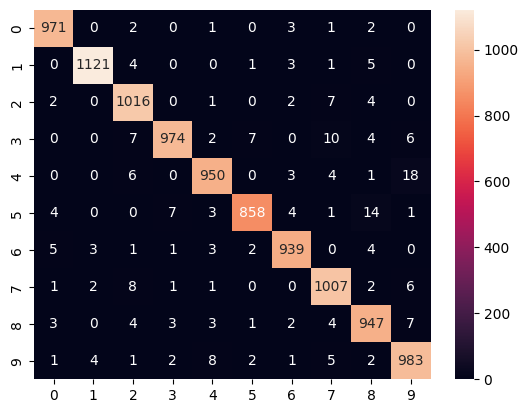

In [76]:
import seaborn as sns
sns.heatmap(cm, annot= True, fmt='d')